In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'1.15.0'

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
bank_data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Neural Networks/Project1/bank.csv')

In [8]:
bank_data.shape

(10000, 14)

In [9]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
# As 'RowNumber', 'CustomerId', 'Surname ' are not significant in deciding if a customer is churning out or not, deleting these columns
bank_data = bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [12]:
bank_data.shape

(10000, 11)

In [13]:
bank_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

there are no null/missing values in the dataset.

In [14]:
bank_data[bank_data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


There are no duplicate records in the data set

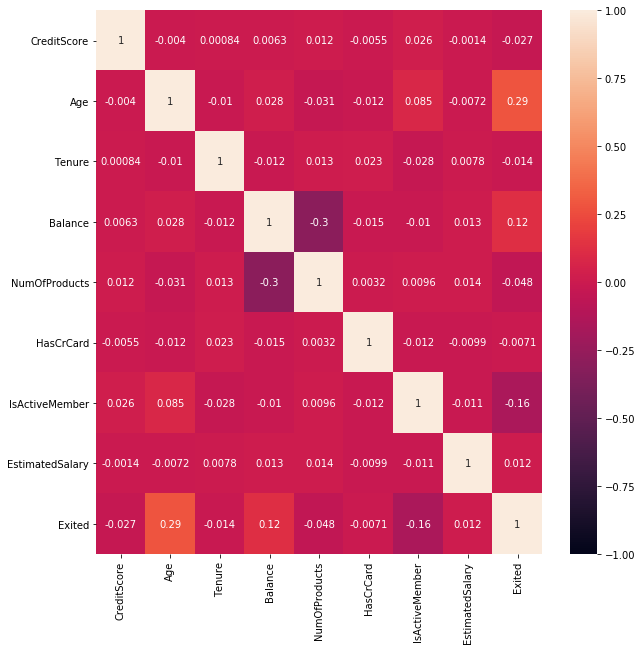

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(bank_data.corr(),vmax = 1, vmin = -1,annot = True)

By above we can say that thereis no problem of multicolleniarity to remove any furthur features from dataset

In [0]:
# Lets encode the categorical features of data set
bank_data_encoded = pd.get_dummies(bank_data, drop_first=True)

In [16]:
bank_data_encoded.head().T

,0,1,2,3,4
CreditScore,619.00,608.00,502.00,699.00,850.00
Age,42.00,41.00,42.00,39.00,43.00
Tenure,2.00,1.00,8.00,1.00,2.00
Balance,0.00,83807.86,159660.80,0.00,125510.82
NumOfProducts,1.00,1.00,3.00,2.00,1.00
HasCrCard,1.00,0.00,1.00,0.00,1.00
IsActiveMember,1.00,1.00,0.00,0.00,1.00
EstimatedSalary,101348.88,112542.58,113931.57,93826.63,79084.10
Exited,1.00,0.00,1.00,0.00,0.00
Geography_Germany,0.00,0.00,0.00,0.00,0.00


In [17]:
bank_data_encoded.shape

(10000, 12)

In [0]:
# distinguish the feature set and target set
X = bank_data_encoded.drop('Exited', axis=1)
y = bank_data_encoded['Exited']

In [0]:
#Divide the data set into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [0]:
#Normalize the train and test data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train.shape

(8000, 11)

In [22]:
X_test.shape

(2000, 11)

In [0]:
#initialising the model
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
#adding 1st hidden layer
model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(11, )))
#adding 2nd hidden layer
model.add(tf.keras.layers.Dense(5, activation='relu'))
#adding output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#compile the model
sgd = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 67us/sample - loss: 0.5389 - acc: 0.7765 - val_loss: 0.4837 - val_acc: 0.7925
Epoch 2/100
8000/8000 [==============================] - 0s 57us/sample - loss: 0.4661 - acc: 0.7972 - val_loss: 0.4515 - val_acc: 0.7925
Epoch 3/100
8000/8000 [==============================] - 0s 52us/sample - loss: 0.4439 - acc: 0.7974 - val_loss: 0.4354 - val_acc: 0.7925
Epoch 4/100
8000/8000 [==============================] - 0s 52us/sample - loss: 0.4319 - acc: 0.7991 - val_loss: 0.4253 - val_acc: 0.7970
Epoch 5/100
8000/8000 [==============================] - 0s 52us/sample - loss: 0.4234 - acc: 0.8036 - val_loss: 0.4185 - val_acc: 0.7980
Epoch 6/100
8000/8000 [==============================] - 0s 55us/sample - loss: 0.4164 - acc: 0.8089 - val_loss: 0.4116 - val_acc: 0.8065
Epoch 7/100
8000/8000 [==============================] - 0s 55us/sample - loss: 0.4094 - acc: 0.8100 - val_loss: 0.4046 - va

In [0]:
#Predict the results using 0.5 as a threshold
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [30]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [31]:
# Print the Accuracy score and confusion matrix
from sklearn.metrics import confusion_matrix
cMatrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['No', 'Yes'], columns=['No', 'Yes'])
cMatrix.index.name = 'Actual'
cMatrix.columns.name = 'ModelPredicted'
cMatrix

ModelPredicted,No,Yes
Actual,,
No,1533,52
Yes,226,189


In [0]:
train_acc = model.evaluate(X_train, y_train,verbose = 0)
test_acc = model.evaluate(X_test, y_test,verbose = 0)

In [34]:
print('The Train accuracy is - ',train_acc[1], 'The test accuracy is - ', test_acc[1])

The Train accuracy is -  0.865125 The test accuracy is -  0.861
